In [137]:
import os
import json
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
PATH = "./sample_data/"
tqdm.pandas()
%matplotlib inline
from collections import Counter

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_json("./aerospace_11.json")

In [8]:
df

,url,title,date_publ,authors,abstract,categories,url_pdf
0,https://arxiv.org/abs/1402.5891,Title:Numerical and Experimental Studies on th...,24 Feb 2014,"[Qin Li, Yonghua Yan, Ping Lu, Adam Pierce, Ch...","Abstract: In this paper, the implicitly imple...",[Fluid Dynamics (physics.flu-dyn)],/pdf/1402.5891
1,https://arxiv.org/abs/1402.5889,Title:LES Study on the Mechanism of Vortex Rin...,24 Feb 2014,"[Yonghua Yan, Caixia Chen, Ping Lu, Chaoqun Li]","Abstract: In this study, we investigate the i...",[Fluid Dynamics (physics.flu-dyn)],/pdf/1402.5889
2,https://arxiv.org/abs/1402.5885,Title:Universal High Order Subroutine with New...,24 Feb 2014,"[M. Oliveria, P. Lu, X. Liu, C. Li]",Abstract: The goal of this work is to develop...,[Computational Physics (physics.comp-ph)],/pdf/1402.5885
3,https://arxiv.org/abs/1402.5882,Title:Improvement of Mixing Function for Modif...,24 Feb 2014,"[Huankun Fu, Ping Lu, Chaoqun Li]",Abstract: The compact scheme has high order a...,"[Computational Physics (physics.comp-ph), Num...",/pdf/1402.5882
4,https://arxiv.org/abs/1402.5877,Title:Numerical Study of Mechanism of U-shaped...,24 Feb 2014,"[Ping Lu, Qin Li, Chaoqun Li]",Abstract: This paper illustrates the mechanis...,[Fluid Dynamics (physics.flu-dyn)],/pdf/1402.5877
5,https://arxiv.org/abs/1402.5873,Title:Numerical Study on Randomization in Late...,24 Feb 2014,"[Ping Lu, Manoj Thapa, Chaoqun Li]",Abstract: The mechanism of randomization in l...,[Chaotic Dynamics (nlin.CD)],/pdf/1402.5873
6,https://arxiv.org/abs/1402.5586,Title:Adaptive Zero Reaction Motion Control fo...,"23 Feb 2014 (v1), last revised 14 Dec 2015 (th...","[Shuanfeng Xu, Hanlei Wang, Duzhou Zhang, Baoh...",Abstract: This paper investigates adaptive ze...,[Systems and Control (eess.SY)],/pdf/1402.5586
7,https://arxiv.org/abs/1402.2710,Title:Direction Finding Algorithms with Joint ...,12 Feb 2014,"[L. Wang, R. C. de Lamare, M. Haard]","Abstract: In this paper, a reduced-rank schem...",[Data Structures and Algorithms (cs.DS)],/pdf/1402.2710
8,https://arxiv.org/abs/1401.4802,Title:Process Evolution Supported by Rationale...,20 Jan 2014,"[Alexis Ocampo, Jürgen Münc]",Abstract: Evolving a software process model w...,[Software Engineering (cs.SE)],/pdf/1401.4802
9,https://arxiv.org/abs/1401.1910,Title:Aligning Software-related Strategies in ...,9 Jan 2014,"[Martin Kowalczyk, Jürgen Münch, Masafumi Kata...",Abstract: Aligning the activities of an organ...,[Software Engineering (cs.SE)],/pdf/1401.1910


In [126]:
def preprocess_text_dist(text, flag):
    text = text.lower()
    text = text.replace("abstract:","")
    text = re.sub("[^A-Za-z]+"," ",text)
    if flag:
        stop_words = stopwords.words()
        text_tokens = nltk.word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if not word in stop_words]
        filtered_sentence = (" ").join(tokens_without_sw)
        text = filtered_sentence
    
    return text


In [131]:
df['cleaned_abstract_dist'] = df['abstract'].progress_apply(lambda x: preprocess_text_dist(x,True))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.68it/s]


In [132]:
df[["title","categories","abstract", "cleaned_abstract_dist"]]

,title,categories,abstract,cleaned_abstract_dist
0,Title:Numerical and Experimental Studies on th...,[Fluid Dynamics (physics.flu-dyn)],"Abstract: In this paper, the implicitly imple...",paper implicitly implemented method fifth orde...
1,Title:LES Study on the Mechanism of Vortex Rin...,[Fluid Dynamics (physics.flu-dyn)],"Abstract: In this study, we investigate the i...",study investigate interaction vortex rings beh...
2,Title:Universal High Order Subroutine with New...,[Computational Physics (physics.comp-ph)],Abstract: The goal of this work is to develop...,goal work develop new universal high order sub...
3,Title:Improvement of Mixing Function for Modif...,"[Computational Physics (physics.comp-ph), Num...",Abstract: The compact scheme has high order a...,compact scheme high order accuracy high resolu...
4,Title:Numerical Study of Mechanism of U-shaped...,[Fluid Dynamics (physics.flu-dyn)],Abstract: This paper illustrates the mechanis...,paper illustrates mechanism shaped vortex form...
5,Title:Numerical Study on Randomization in Late...,[Chaotic Dynamics (nlin.CD)],Abstract: The mechanism of randomization in l...,mechanism randomization late boundary layer tr...
6,Title:Adaptive Zero Reaction Motion Control fo...,[Systems and Control (eess.SY)],Abstract: This paper investigates adaptive ze...,paper investigates adaptive zero reaction moti...
7,Title:Direction Finding Algorithms with Joint ...,[Data Structures and Algorithms (cs.DS)],"Abstract: In this paper, a reduced-rank schem...",paper reduced rank scheme joint iterative opti...
8,Title:Process Evolution Supported by Rationale...,[Software Engineering (cs.SE)],Abstract: Evolving a software process model w...,evolving software process model without retros...
9,Title:Aligning Software-related Strategies in ...,[Software Engineering (cs.SE)],Abstract: Aligning the activities of an organ...,aligning activities organization business goal...


In [140]:
p = Counter(" ".join(df['cleaned_abstract_dist']).split()).most_common(20)
result = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(result)

           Word  Frequency
0         paper         35
1       results         30
2         based         29
3         order         28
4      proposed         27
5         model         24
6          high         24
7           new         22
8      approach         22
9         shock         21
10          two         21
11      problem         18
12   algorithms         18
13    aerospace         17
14       design         17
15       scheme         16
16   simulation         16
17  performance         16
18       system         16
19        first         15


<AxesSubplot:>

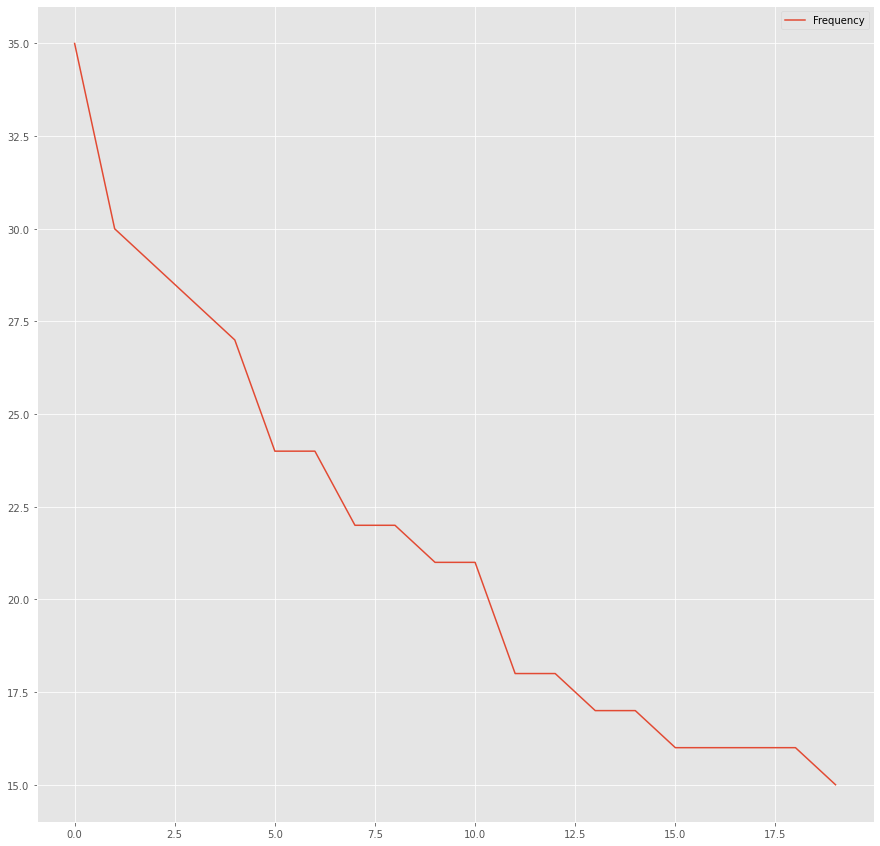

In [141]:
result.plot(figsize=(15,15))